In [1]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: google-images-search 1.4.6 has a non-standard dependency specifier click>=7.0<=8.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of google-images-search or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# Toxic Comment Classification 

- Sentimental Analysis
- Supervised Classifier Model
    - Feature Engineering with Text vectorization
- Dimensionality reduction by NMF

In [52]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import pingouin as pg
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [3]:
comments = pd.read_csv('youtoxic_english_1000.csv')
comments

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
comments.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
comments.tail()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False
999,UgjBJKQSoQMQ6ngCoAEC,XRuCW80L9mA,"God, the narrator has such an annoying lisp.",False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
comments.shape

(1000, 15)

In [7]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [8]:
comments.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [9]:
comments.isna().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

## Sentimental Analysis : Common Racist Words

In [10]:
comments['words'] = comments['Text'].str.split(r'[@|#|,|.|/|"|\s+]')
comments['words']

0      [If, only, people, would, just, take, a, step,...
1      [Law, enforcement, is, not, trained, to, shoot...
2      [, Dont, you, reckon, them, 'black, lives, mat...
3      [There, are, a, very, large, number, of, peopl...
4      [The, Arab, dude, is, absolutely, right, , he,...
                             ...                        
995    [I, remember, that, they, sent, in, the, natio...
996    [Stats, don`t, represent, the, problem, , Race...
997    [The, quote, from, the, mother, , , , Wow, tha...
998                        [this, video, is, so, racist]
999    [God, , the, narrator, has, such, an, annoying...
Name: words, Length: 1000, dtype: object

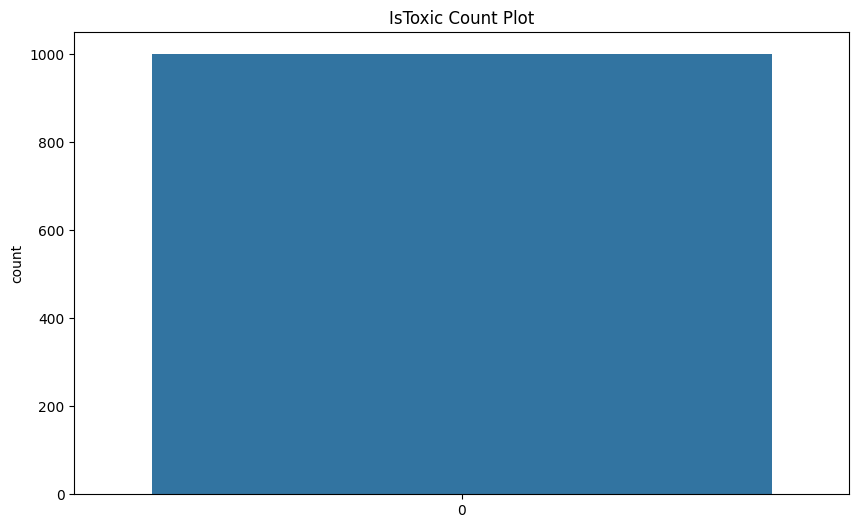

In [11]:
#count plot for IsToxic
plt.figure(figsize=(10,6))
sns.countplot(comments['IsToxic'])
plt.title('IsToxic Count Plot')
plt.show()

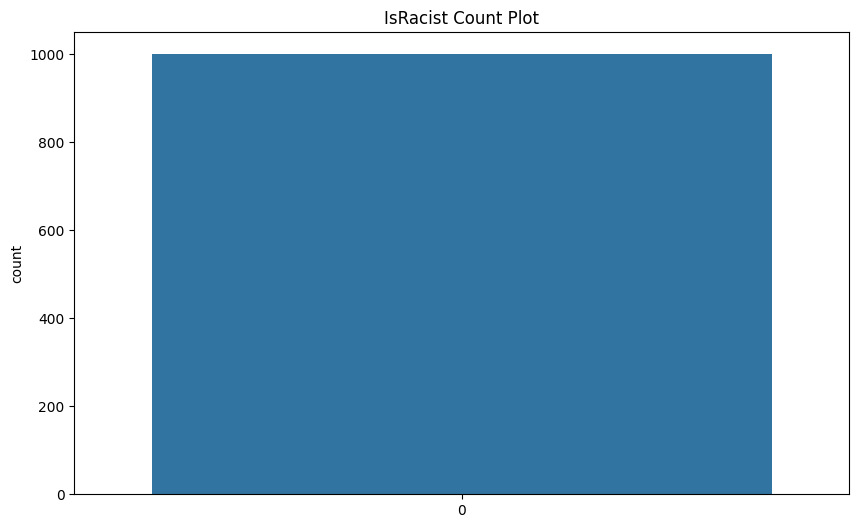

In [12]:
#count plot for IsRacist
plt.figure(figsize=(10,6))
sns.countplot(comments['IsRacist'])
plt.title('IsRacist Count Plot')
plt.show()

**We have identified the most common word in racist comments, which is 'black'.**

In [13]:
comments['Text'] = comments['Text'].str.lower()
comments['word_black'] = np.where(comments['Text'].str.contains('black'), True, False)
comments[['Text', 'IsRacist', 'word_black']]

,Text,IsRacist,word_black
0,if only people would just take a step back and...,False,False
1,law enforcement is not trained to shoot to app...,False,False
2,\ndont you reckon them 'black lives matter' ba...,False,True
3,there are a very large number of people who do...,False,False
4,"the arab dude is absolutely right, he should h...",False,False
...,...,...,...
995,i remember that they sent in the national defe...,False,False
996,stats don`t represent the problem. race baitin...,True,False
997,the quote from the mother... wow that hit hard...,False,False
998,this video is so racist,False,False


**Association test (chi-square) between Racist comment and 'Black' word**

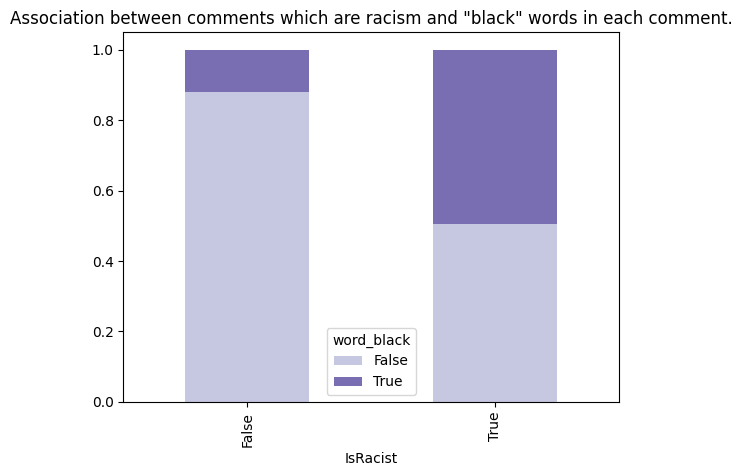

In [14]:
black_racist = comments.groupby('IsRacist', as_index = True)['word_black'].value_counts(normalize = True)
black_racist = black_racist.unstack()
black_racist.plot(kind = 'bar', stacked = True, color = sns.color_palette('Purples', 2))
plt.title('Association between comments which are racism and "black" words in each comment.')
plt.show()

In [15]:
black_racist_ct = pd.crosstab(comments['word_black'], comments['IsRacist'])
black_racist_ct = black_racist_ct.sort_index(axis = 0, ascending = False)
black_racist_ct = black_racist_ct.sort_index(axis = 1, ascending = False)
black_racist_ct

IsRacist,True,False
word_black,,
True,62,104
False,63,771


In [16]:
expected, observed, chi_stats = pg.chi2_independence(data = comments, x = 'IsRacist', y = 'word_black')
chi_stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,109.663732,1.0,1.161069e-25,0.331155,1.0
1,cressie-read,0.666667,99.632820,1.0,1.834392e-23,0.315647,1.0
2,log-likelihood,0.000000,85.594908,1.0,2.208434e-20,0.292566,1.0
3,freeman-tukey,-0.500000,78.917574,1.0,6.475613e-19,0.280923,1.0
4,mod-log-likelihood,-1.000000,74.621855,1.0,5.700860e-18,0.273170,1.0
5,neyman,-2.000000,71.197332,1.0,3.232248e-17,0.266828,1.0


In conclusion, based on the sentiment analysis and the chi-square test results, there appears to be a significant association between the term "black" and the attribute "IsRacist." The test suggests that the word "black" is more likely to be associated with instances labeled as True for the attribute "IsRacist" compared to those labeled as False.

## Supervised Classifier Models : Toxic comment classification

Models : KNN, Logistic Regression, SVC, Decision tree, Random forest

### Pre-processing 

In [17]:
toxic = comments[['Text', 'IsToxic']]
toxic

,Text,IsToxic
0,if only people would just take a step back and...,False
1,law enforcement is not trained to shoot to app...,True
2,\ndont you reckon them 'black lives matter' ba...,True
3,there are a very large number of people who do...,False
4,"the arab dude is absolutely right, he should h...",False
...,...,...
995,i remember that they sent in the national defe...,False
996,stats don`t represent the problem. race baitin...,True
997,the quote from the mother... wow that hit hard...,False
998,this video is so racist,False


### Feature Engineering : Text vectorization 

In [18]:
vec = TfidfVectorizer()
tfidf_matrix = vec.fit_transform(toxic['Text'])

print('Vocabulary :')
print(vec.get_feature_names_out())

print('TF-IDF Matrix Shape :')
print(tfidf_matrix.shape)

Vocabulary :
['00' '000' '03' ... 'zimmerman' 'zionist' 'zone']
TF-IDF Matrix Shape :
(1000, 4576)


In [19]:
dense_tfidf_matrix = tfidf_matrix.toarray()
print('TF-IDF Matrix Array :')
print(dense_tfidf_matrix)

TF-IDF Matrix Array :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
dense_tfidf_matrix = pd.DataFrame(dense_tfidf_matrix, columns = vec.get_feature_names_out())
dense_tfidf_matrix

,00,000,03,05,08,09,10,100,10th,11,...,youse,youth,youtu,youtube,ypu,yr,yup,zimmerman,zionist,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
toxic_vectorized = pd.concat([toxic, dense_tfidf_matrix], axis = 1)
toxic_vectorized

,Text,IsToxic,00,000,03,05,08,09,10,100,...,youse,youth,youtu,youtube,ypu,yr,yup,zimmerman,zionist,zone
0,if only people would just take a step back and...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,law enforcement is not trained to shoot to app...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,\ndont you reckon them 'black lives matter' ba...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,there are a very large number of people who do...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"the arab dude is absolutely right, he should h...",False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,i remember that they sent in the national defe...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,stats don`t represent the problem. race baitin...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,the quote from the mother... wow that hit hard...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,this video is so racist,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**This data doesn't require imputing or standardization**

### Split Data

In [22]:
X = toxic_vectorized.drop(['Text', 'IsToxic'], axis = 1)
y = toxic_vectorized['IsToxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 123)

In [23]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

### Hyperparameter tuning

#### K-Nearest Neighbors Classifier

In [24]:
knn = KNeighborsClassifier()
knn_param = {'n_neighbors':np.arange(1, 41)}
knn_cv = GridSearchCV(knn, param_grid = knn_param, cv = kf)
knn_cv.fit(X_train, y_train)

print("Tuned KNN paramaters: {}".format(knn_cv.best_params_))
print("Tuned KNN score: {}".format(knn_cv.best_score_))

Tuned KNN paramaters: {'n_neighbors': 37}
Tuned KNN score: 0.6300000000000001


#### Logistic Regression

In [25]:
logreg = LogisticRegression(penalty = 'l2')
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Predict the test set
y_pred = logreg.predict(X_test)
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy :', accuracy)

Logistic Regression Accuracy : 0.68


#### Support Vector Machine

In [27]:
svc = SVC()
svc_param = {'kernel':['linear', 'rbf'], 'C':[0.1, 1.0, 10], 'gamma':np.linspace(0.00001, 10, num = 7)}
svc_cv = GridSearchCV(svc, param_grid = svc_param, cv = kf)
svc_cv.fit(X_train, y_train)

print('Tuned SVC parameters: {}'.format(svc_cv.best_params_))
print('Tuned SVC score: {}'.format(svc_cv.best_score_))

Tuned SVC parameters: {'C': 1.0, 'gamma': 1e-05, 'kernel': 'linear'}
Tuned SVC score: 0.6557142857142857


#### Decision Tree Classifier

In [28]:
tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [None, 5, 10],
          'min_samples_split': np.arange(2, 11),
          'min_samples_leaf': np.arange(1, 11)}

tree_cv = GridSearchCV(tree, param_g
                       rid = params, cv = kf)
tree_cv.fit(X_train, y_train)

print('Tuned Decision Tree parameters : {}'.format(tree_cv.best_params_))
print('Tuned Decision Tree scores : {}'.format(tree_cv.best_score_))

Tuned Decision Tree parameters : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 9}
Tuned Decision Tree scores : 0.6457142857142857


#### Random Forest Classifer

In [29]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Predict the test set
y_pred = forest.predict(X_test)
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy :', accuracy)

Random Forest Accuracy : 0.7


### Evaluate Model Performance

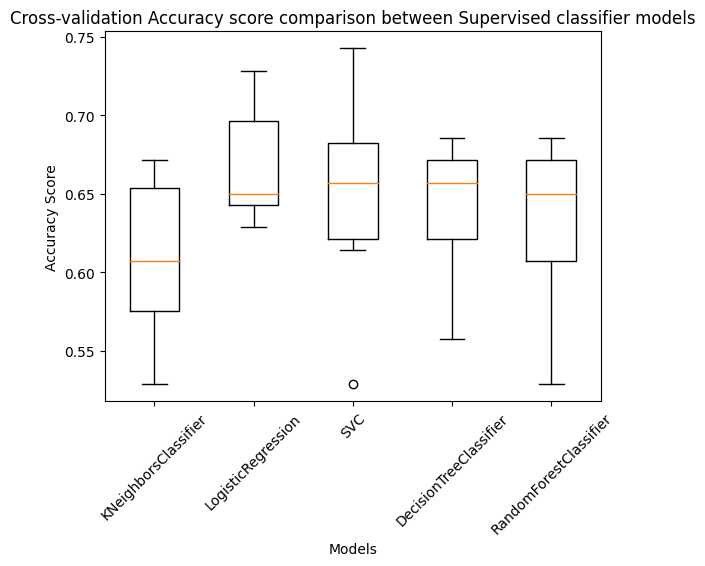

In [31]:
models = {'KNeighborsClassifier':KNeighborsClassifier(n_neighbors = 10),
          'LogisticRegression':LogisticRegression(penalty = 'l2', C = 10),
          'SVC':SVC(kernel = 'linear', C = 1.0, gamma = 0.00001, probability=True),
          'DecisionTreeClassifier':DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split = 4),
          'RandomForestClassifier':RandomForestClassifier(n_estimators = 20)
         }

results = []
for model in models.values() :
    kf = KFold(n_splits = 10, shuffle = True, random_state = 123)
    cv_score = cross_val_score(model, X_train, y_train, cv = kf)
    results.append(cv_score)

plt.boxplot(results, labels = models.keys())
plt.title('Cross-validation Accuracy score comparison between Supervised classifier models')
plt.xticks(rotation = 45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

### Compare Area under ROC curve

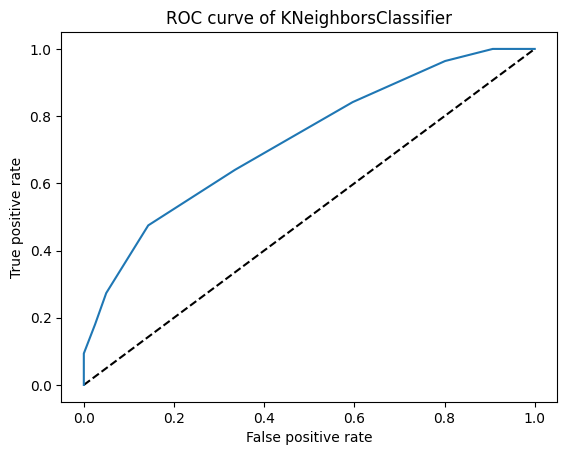

Area Under ROC curve : 0.7264623084141383
Accuracy score : 0.68
              precision    recall  f1-score   support

       False       0.65      0.86      0.74       161
        True       0.74      0.47      0.58       139

    accuracy                           0.68       300
   macro avg       0.70      0.67      0.66       300
weighted avg       0.69      0.68      0.67       300




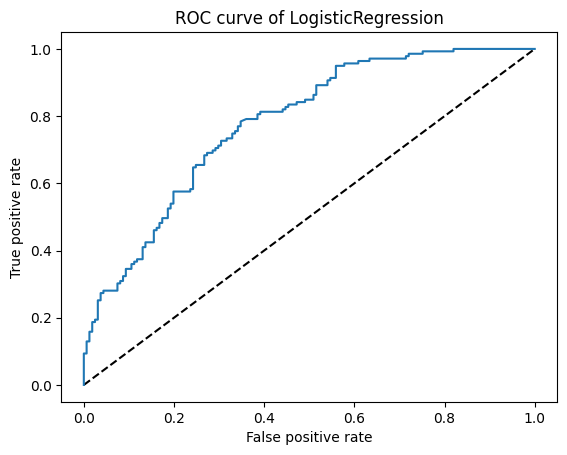

Area Under ROC curve : 0.7785423834845167
Accuracy score : 0.69
              precision    recall  f1-score   support

       False       0.69      0.76      0.72       161
        True       0.69      0.61      0.65       139

    accuracy                           0.69       300
   macro avg       0.69      0.68      0.69       300
weighted avg       0.69      0.69      0.69       300




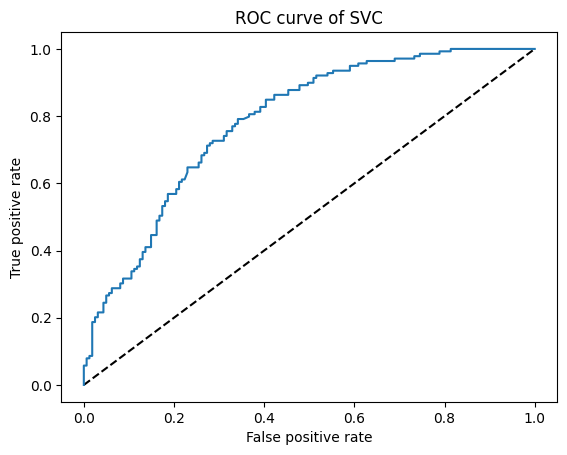

Area Under ROC curve : 0.7849993297287635
Accuracy score : 0.7033333333333334
              precision    recall  f1-score   support

       False       0.70      0.79      0.74       161
        True       0.71      0.60      0.65       139

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300




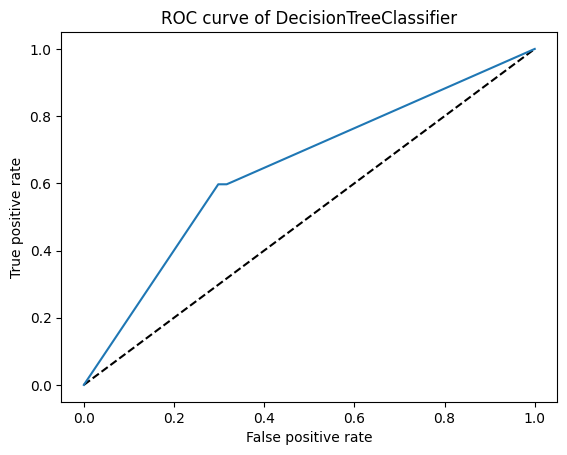

Area Under ROC curve : 0.6456946244246838
Accuracy score : 0.6433333333333333
              precision    recall  f1-score   support

       False       0.66      0.68      0.67       161
        True       0.62      0.60      0.61       139

    accuracy                           0.64       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.64      0.64      0.64       300




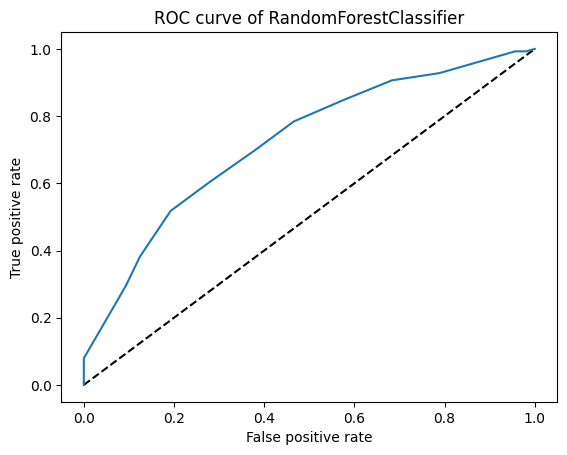

Area Under ROC curve : 0.7217033826355065
Accuracy score : 0.6466666666666666
              precision    recall  f1-score   support

       False       0.62      0.88      0.73       161
        True       0.73      0.38      0.50       139

    accuracy                           0.65       300
   macro avg       0.67      0.63      0.61       300
weighted avg       0.67      0.65      0.62       300




In [32]:
for name, model in models.items() :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_probs = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.plot([0, 1], [0, 1], '--k')
    plt.plot(fpr, tpr)
    plt.title('ROC curve of {}'.format(name))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('Area Under ROC curve :', roc_auc_score(y_test, y_pred_probs))
    print('Accuracy score :', accuracy)
    print(report)
    print()

## Dimensionality reduction by NMF

In [33]:
toxic_vectorized_samples = toxic_vectorized.drop(['Text', 'IsToxic'], axis = 1)
nmf = NMF(n_components = 2)
nmf.fit(toxic_vectorized_samples)
nmf_features = nmf.transform(toxic_vectorized_samples)
print(nmf_features)
print(nmf_features.shape)

[[0.23277281 0.01923119]
 [0.08587757 0.00117973]
 [0.12499886 0.04928589]
 ...
 [0.0527162  0.        ]
 [0.07233971 0.        ]
 [0.02856653 0.        ]]
(1000, 2)


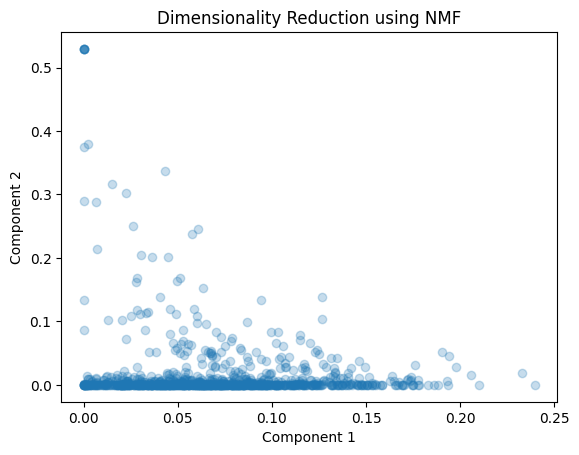

In [34]:
plt.scatter(nmf_features[:, 0], nmf_features[:, 1], alpha = 0.25)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Dimensionality Reduction using NMF")
plt.show()

In [35]:
nmf_features = pd.DataFrame(nmf_features, index = toxic_vectorized['Text'])
nmf_features

,0,1
Text,,
"if only people would just take a step back and not make this case about them, because it wasn't about anyone except the two people in that situation. to lump yourself into this mess and take matters into your own hands makes these kinds of protests selfish and without rational thought and investigation. the guy in this video is heavily emotional and hyped up and wants to be heard, and when he gets heard he just presses more and more. he was never out to have a reasonable discussion. kudos to the smerconish for keeping level the whole time and letting masri make himself out to be a fool. how dare he and those that tore that city down in protest make this about themselves and to dishonor the entire incident with their own hate. by the way, since when did police brutality become an epidemic? i wish everyone would just stop pretending like they were there and they knew exactly what was going on, because there's no measurable amount of people that honestly witnessed this incident, so none of us have a clue on which way this whole issue should have swung. the grand jury were the most informed, we have to trust the majority rule was the right course of action and let it be. also, thank you to the 99.999% of police officers in america that actually serve & protect, even if you're a bit of a jerk when you pull me over, i respect your job and know that someone has to do it and that many people are going to pout about being held accountable to their actions. people hate police until they need an officer or two around in an emergency.",0.232773,0.019231
law enforcement is not trained to shoot to apprehend. they are trained to shoot to kill. and i thank wilson for killing that punk bitch.,0.085878,0.001180
\ndont you reckon them 'black lives matter' banners being held by white cunts is kinda patronizing and ironically racist. could they have not come up with somethin better.. or is it just what white folks do to give them selves pride. 'ooo look at me im being nice for the black people' why does it always have to be about race actually the whole world is pussyfootin around for fear of being racist. its fuckin daft man.,0.124999,0.049286
"there are a very large number of people who do not like police officers. they are called criminals and its the reason we have police officers. the fact that criminals do not like police officers is a testament to the good work that police officers do in protecting the public. when our children or our family are in danger, we do not hessitate to call for help, and we call the police. its about time people stopped complaining and started to give the police some respect for the hard work and dedication that often requires them to put their lives on the line, to serve the public.",0.164897,0.006286
"the arab dude is absolutely right, he should have not been shot 6 extra time. shoot him once if hes attacking you and that would stop his attack. shoot him twice if he's still attacking you, but six times? that is shoot to kill in my opinion.",0.107942,0.001851
...,...,...
i remember that they sent in the national defence there,0.055255,0.006233
"stats don`t represent the problem. race baiting and attitude is. who`s doing the crimes ? ohh i bet trayvon is still the little innocent boy too. don`t speak with a lisp, a sure sign of a left wing democrat !",0.069416,0.000000
the quote from the mother... wow that hit hard. very accurate.,0.052716,0.000000


### Select Text

In [36]:
selected_text = nmf_features.iloc[1]
selected_text

0    0.085878
1    0.001180
Name: law enforcement is not trained to shoot to apprehend.  they are trained to shoot to kill.  and i thank wilson for killing that punk bitch., dtype: float64

### Showed Similar Toxic Text

In [37]:
similarities = nmf_features.dot(selected_text)
similarities = pd.DataFrame(similarities)
similarities.nlargest(3, columns = 0)

0
Text                                                        
the ugly truth:\n\nif you talk like a thug, act...  0.020584
if only people would just take a step back and ...  0.020013
*what does trayvon martin and michael brown hav...  0.018037

In [38]:
#save the model
import joblib
joblib.dump(models['RandomForestClassifier'], 'toxic_comments_model.pkl')


['toxic_comments_model.pkl']

In [39]:
#load the model
loaded_model = joblib.load('toxic_comments_model.pkl')
loaded_model

RandomForestClassifier(n_estimators=20)

In [62]:
#predict the test set on user input
try:
    user_input = 'I am good'
    blob = TextBlob(user_input)
    user_input = user_input.lower()
    user_input = pd.Series(user_input)
    user_input = vec.transform(user_input)
    user_input = user_input.toarray()
    loaded_model.predict(user_input)
    print('Predicted :',)
    if blob.sentiment.polarity < 0:
        print('Negative')
    else:
        print('Positive')
except Exception as e:
    print('Error :', e)


Predicted :
Positive


c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
